DecisionTreeClassifier using Website Phishing from UCIML(https://archive.ics.uci.edu/dataset/379/website+phishing)

Data has three different classes the websites are classified into which is our target variable.

In [260]:
#Load the datset using ID from the source
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
website_phishing = fetch_ucirepo(id=379) 
  
# data (as pandas dataframes) 
X = website_phishing.data.features 
y = website_phishing.data.targets 
  
# metadata 
print(website_phishing.metadata)
  
# variable information 
print(website_phishing.variables) 


{'uci_id': 379, 'name': 'Website Phishing', 'repository_url': 'https://archive.ics.uci.edu/dataset/379/website+phishing', 'data_url': 'https://archive.ics.uci.edu/static/public/379/data.csv', 'abstract': '\n\n', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1353, 'num_features': 9, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['Result'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2014, 'last_updated': 'Thu Mar 21 2024', 'dataset_doi': '10.24432/C5B301', 'creators': ['Neda Abdelhamid'], 'intro_paper': {'ID': 440, 'type': 'NATIVE', 'title': 'Phishing detection based Associative Classification data mining', 'authors': 'Neda Abdelhamid, A. Ayesh, F. Thabtah', 'venue': 'Expert systems with applications', 'year': 2014, 'journal': None, 'DOI': '10.1016/j.eswa.2014.03.019', 'URL': 'https://www.semanticscholar.org/paper/867e2293e9780b729705b4ba48d6b1

In [261]:
#View first five rows of the feature values
X.head()

,SFH,popUpWindow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address
0,1,-1,1,-1,-1,1,1,1,0
1,-1,-1,-1,-1,-1,0,1,1,1
2,1,-1,0,0,-1,0,-1,1,0
3,1,0,1,-1,-1,0,1,1,0
4,-1,-1,1,-1,0,0,-1,1,0


In [262]:
#View first five rows of the target values, which is currently defined as 0,1,-1
y.head()

,Result
0,0
1,1
2,1
3,0
4,1


In [263]:
#Import Model dependencies and define model
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
model = tree.DecisionTreeClassifier()

In [264]:
#Split the train and test data 
X_test, X_train, y_test, y_train = train_test_split(X,y,test_size=0.2, random_state=42)

In [265]:
#Fit the model defined using the train data
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [266]:
#Predict test data with the model fit
y_pred = model.predict(X_test)

In [267]:
#Evaluate the accuracy score metric
accuracy = accuracy_score(y_pred, y_test)
print(f"Accuracy score : {accuracy}")

Accuracy score : 0.8632162661737524


In [268]:
type(y)

pandas.core.frame.DataFrame

In [269]:
y_target = y['Result']

In [270]:
unique_classes = y_target.unique()
print(unique_classes)

[ 0  1 -1]


In [271]:
class_names = ['Phishing (-1)', 'Legitimate (1)', 'Suspicious (0)']

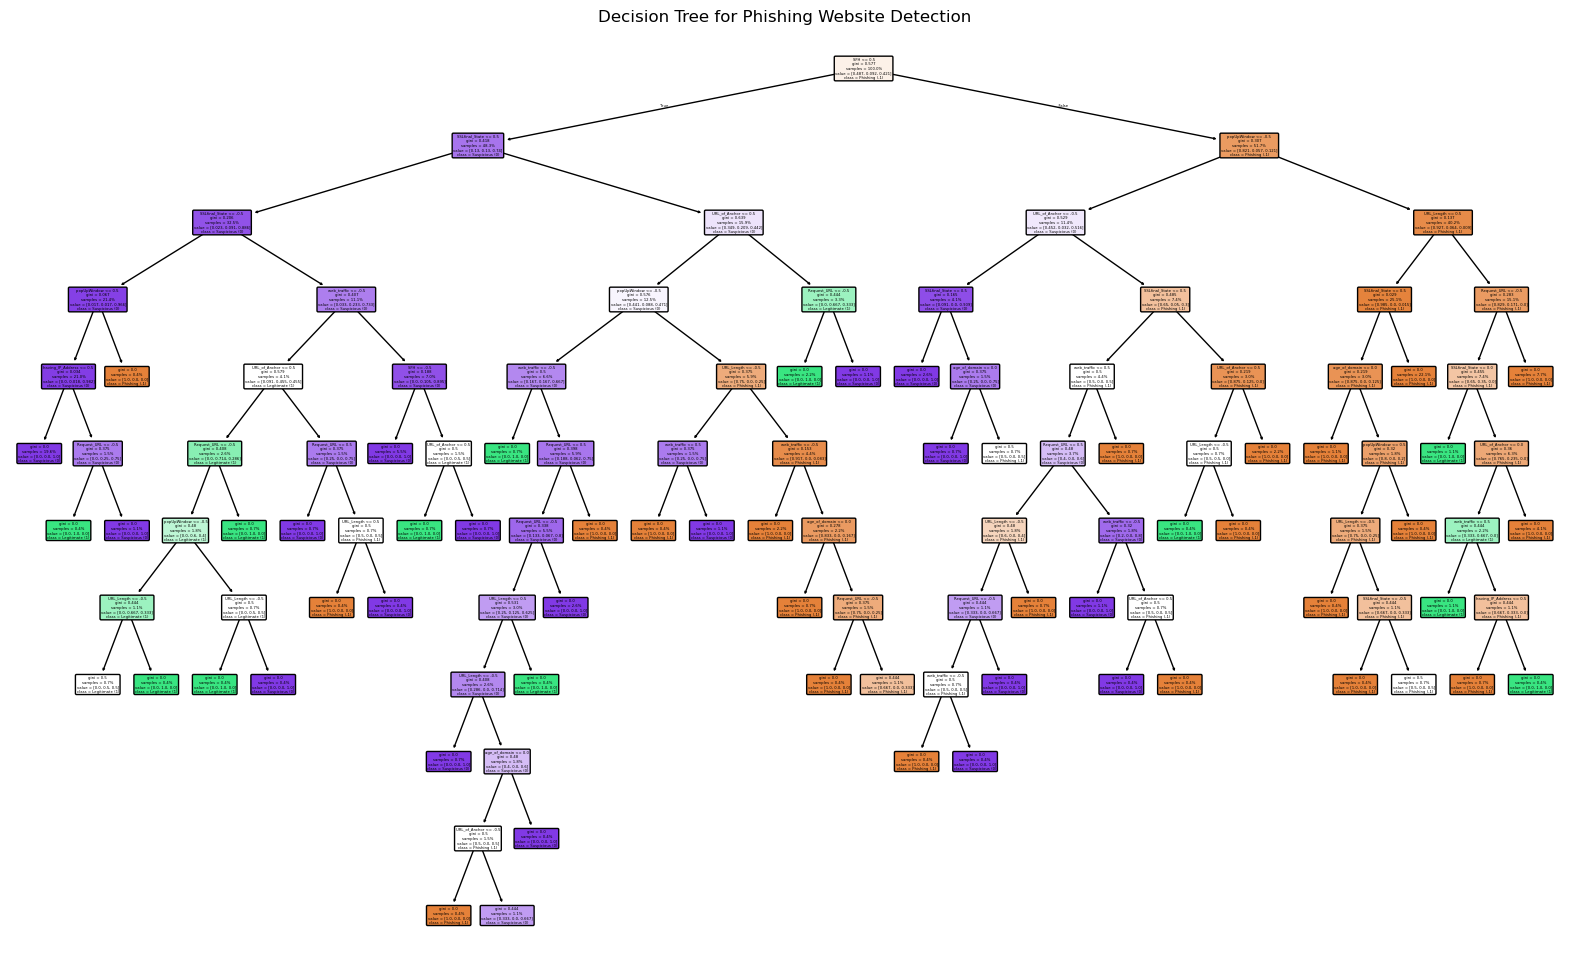

In [272]:
#Plotting tree of the descisiontree classifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,12))

plot_tree(model,
          feature_names=X.columns,
          class_names = class_names,
          filled=True,
          rounded=True,
          proportion=True)

plt.title("Decision Tree for Phishing Website Detection")
plt.show()

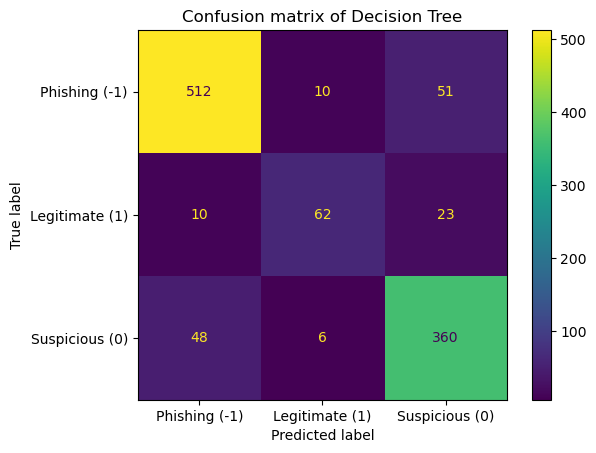

In [273]:
#Confusion Matrix visual with predicted and test data
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_pred,y_test, display_labels= class_names)
plt.title("Confusion matrix of Decision Tree")
plt.show()

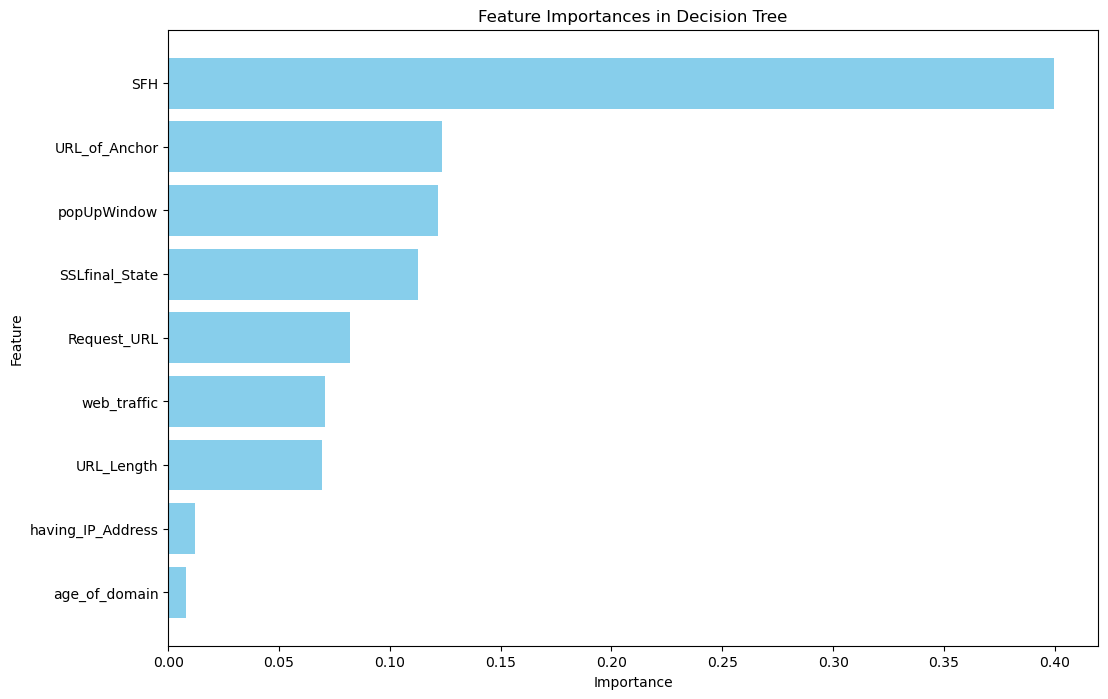

In [274]:
import pandas as pd

# Retrieve feature importances
feature_importances = model.feature_importances_

# Create a DataFrame for better visualization
feat_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort features by importance
feat_importances = feat_importances.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.barh(feat_importances['Feature'], feat_importances['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in Decision Tree')
plt.gca().invert_yaxis()  # Highest importance at the top
plt.show()


In [275]:
#Applying pruning to further improve model and accuracy
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=0)
path = model.cost_complexity_pruning_path(X_train,y_train)
# ccp_alphas = path.ccp_alphas
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas) 

[0.         0.00061501 0.00061501 0.00069188 0.00081398 0.00123001
 0.00150956 0.0018743  0.0018743  0.00246002 0.00276753 0.00295203
 0.00322878 0.00344403 0.0036253  0.00407661 0.00442804 0.0048278
 0.00492005 0.00553506 0.00660322 0.00712782 0.00719557 0.00740404
 0.0078446  0.00951741 0.00968635 0.0098401  0.01476015 0.0156612
 0.01796648 0.03388959 0.04307402 0.2164766 ]


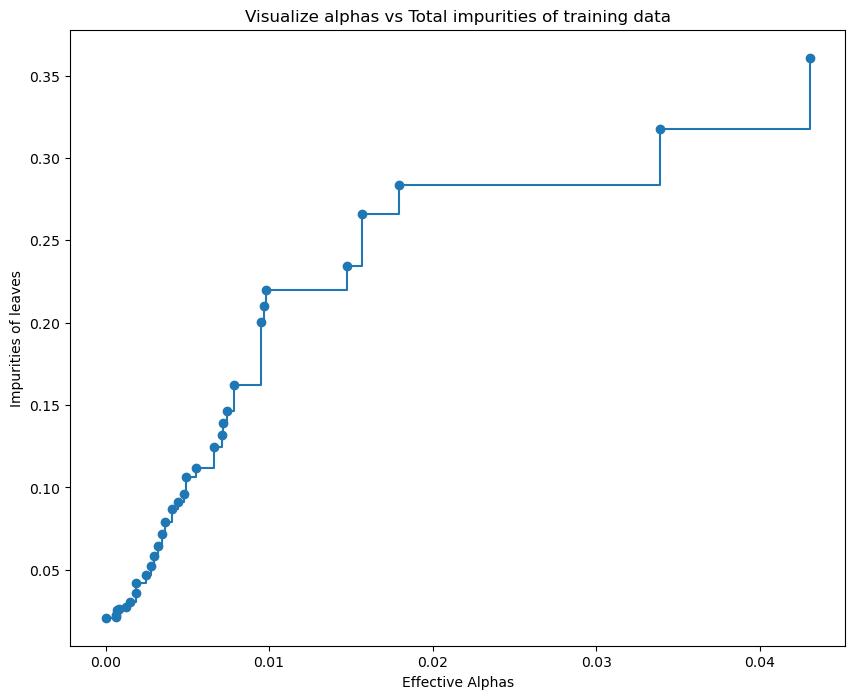

In [276]:
#Plotting effective alphas and number of leaves
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.plot(ccp_alphas[:-1],impurities[:-1],marker ='o',drawstyle='steps-post')
plt.xlabel("Effective Alphas")
plt.ylabel("Impurities of leaves")
plt.title("Visualize alphas vs Total impurities of training data")
plt.show()

In [277]:
models = []
for ccp_alpha in ccp_alphas:
    model = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    model.fit(X_train,y_train)
    models.append(model)


In [278]:
trainscores = [model.score(X_train,y_train) for model in models]
testscores = [model.score(X_test,y_test) for model in models]

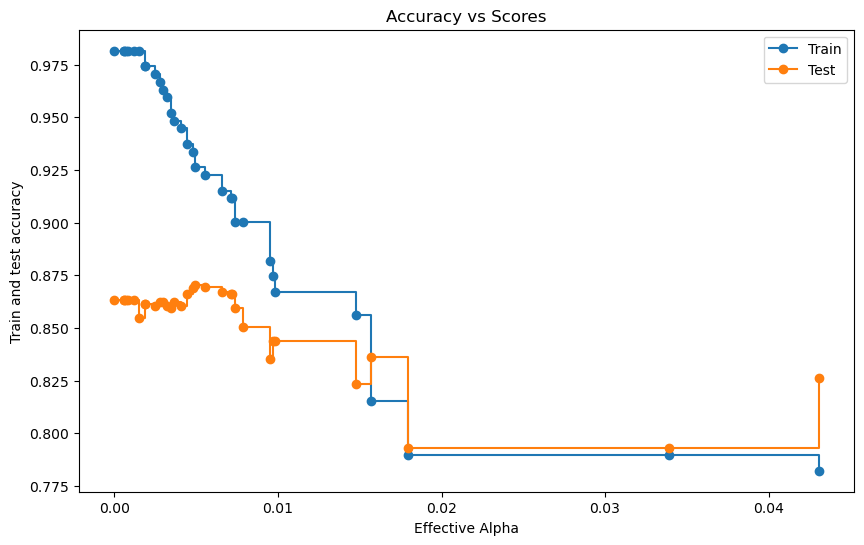

In [279]:
#Plotting Effective alphas vs train and test accuracy
plt.figure(figsize=(10,6))
plt.plot(ccp_alphas[:-1],trainscores[:-1],label='Train',marker='o',drawstyle='steps-post')
plt.plot(ccp_alphas[:-1],testscores[:-1],label='Test',marker='o',drawstyle='steps-post')
plt.xlabel("Effective Alpha")
plt.ylabel("Train and test accuracy")
plt.title("Accuracy vs Scores")
plt.legend()
plt.show()


In [280]:
#Pruned Model
optimal_alpha = ccp_alphas[1]
pruned_model = DecisionTreeClassifier(random_state=0,ccp_alpha=0.008)
pruned_model.fit(X_train,y_train)

print(f"Depth before pruning: {model.get_depth()}")
print(f"Leaves before pruning: {model.get_n_leaves()}")
print(f"Depth after Pruning: {pruned_model.get_depth()}")
print(f"Leaves after pruning: {pruned_model.get_n_leaves()}")

Depth before pruning: 0
Leaves before pruning: 1
Depth after Pruning: 6
Leaves after pruning: 14


In [281]:
#Pruned model predictions
ytrain_pred = pruned_model.predict(X_train)
ytest_pred = pruned_model.predict(X_test)

In [282]:
#Evaluate metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

train_accuracy = accuracy_score(y_train,ytrain_pred)
test_accuracy = accuracy_score(y_test,ytest_pred)

print(f"Train data accuracy: {train_accuracy:.2f}")
print(f"Test data accuracy : {test_accuracy:.2f}")

print("Classification Report\n:", classification_report(y_test,ytest_pred)
      )
print("Confusion Matrix:\n", confusion_matrix(y_test,ytest_pred))

Train data accuracy: 0.90
Test data accuracy : 0.85
Classification Report
:               precision    recall  f1-score   support

          -1       0.91      0.89      0.90       570
           0       0.61      0.50      0.55        78
           1       0.81      0.86      0.84       434

    accuracy                           0.85      1082
   macro avg       0.78      0.75      0.76      1082
weighted avg       0.85      0.85      0.85      1082

Confusion Matrix:
 [[506  10  54]
 [  5  39  34]
 [ 44  15 375]]


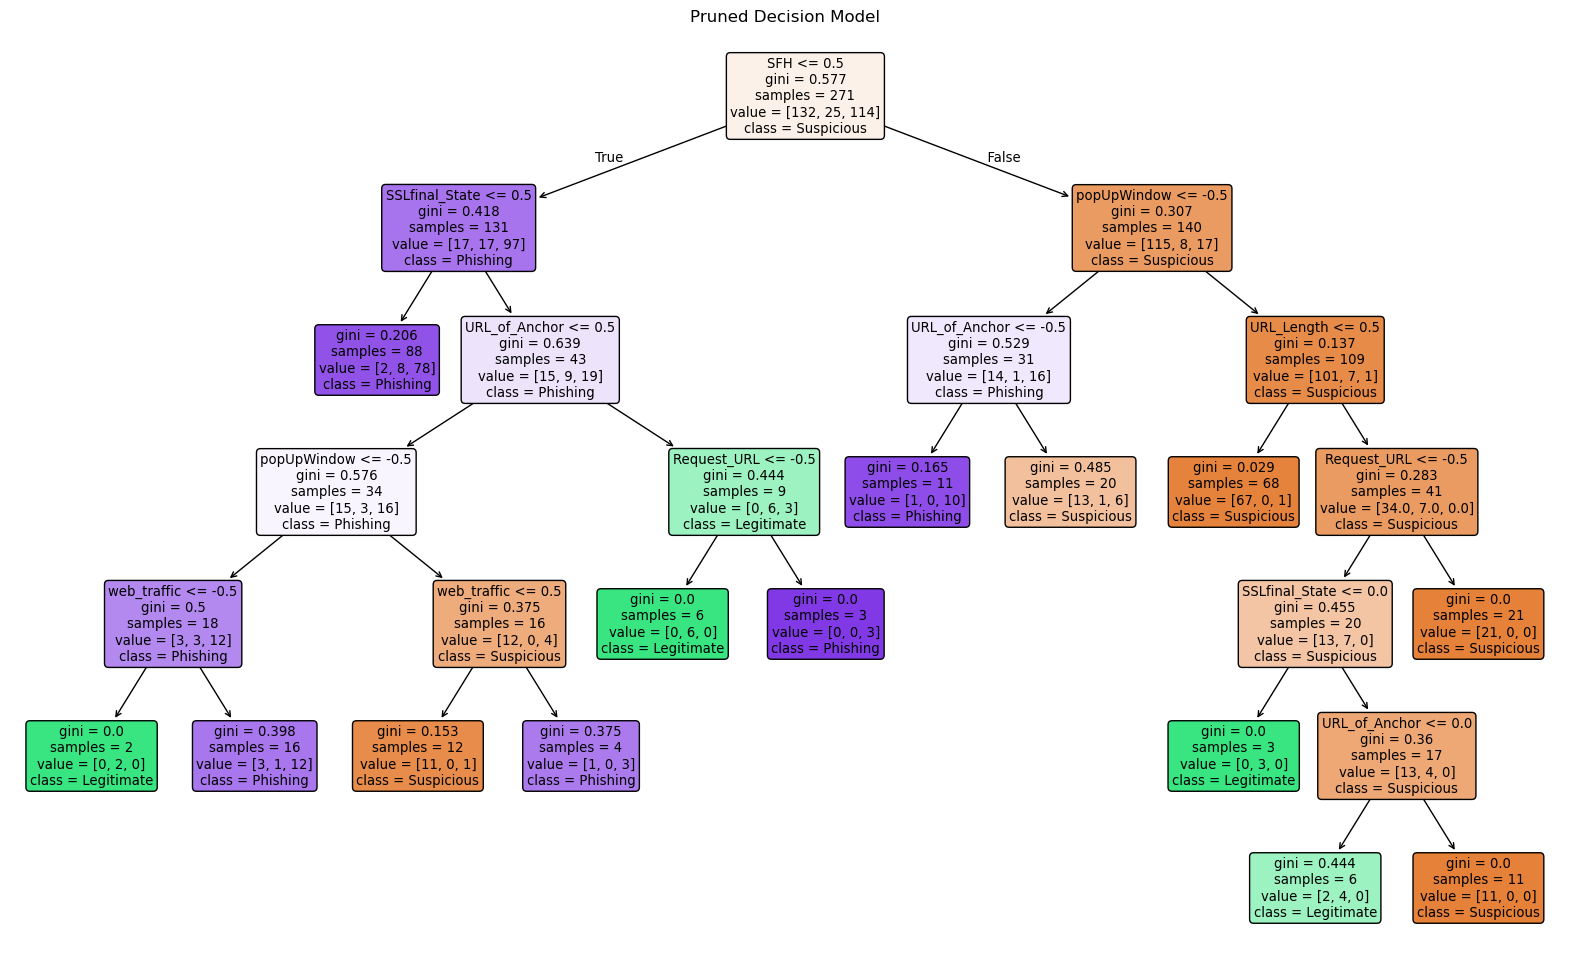

In [283]:
#Plot final pruned tree to visualise pruned model
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,12))
plot_tree(pruned_model, feature_names = X.columns, class_names = ['Suspicious', 'Legitimate', 'Phishing'],filled =True, rounded= True)
plt.title("Pruned Decision Model")
# plt.legend()
plt.show()

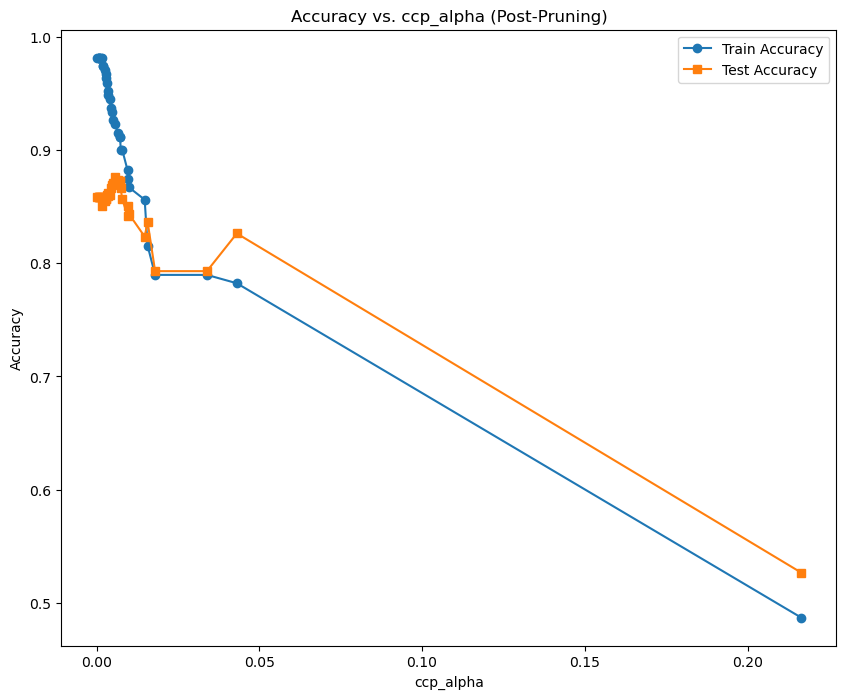

In [284]:
#Post pruning plot
train_scores = []
test_scores = []

for alpha in ccp_alphas:
    model = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha)
    model.fit(X_train, y_train)
    train_scores.append(model.score(X_train, y_train))
    test_scores.append(model.score(X_test, y_test))

plt.figure(figsize=(10, 8))
plt.plot(ccp_alphas, train_scores, marker='o', label="Train Accuracy")
plt.plot(ccp_alphas, test_scores, marker='s', label="Test Accuracy")
plt.xlabel("ccp_alpha")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. ccp_alpha (Post-Pruning)")
plt.legend()
plt.show()


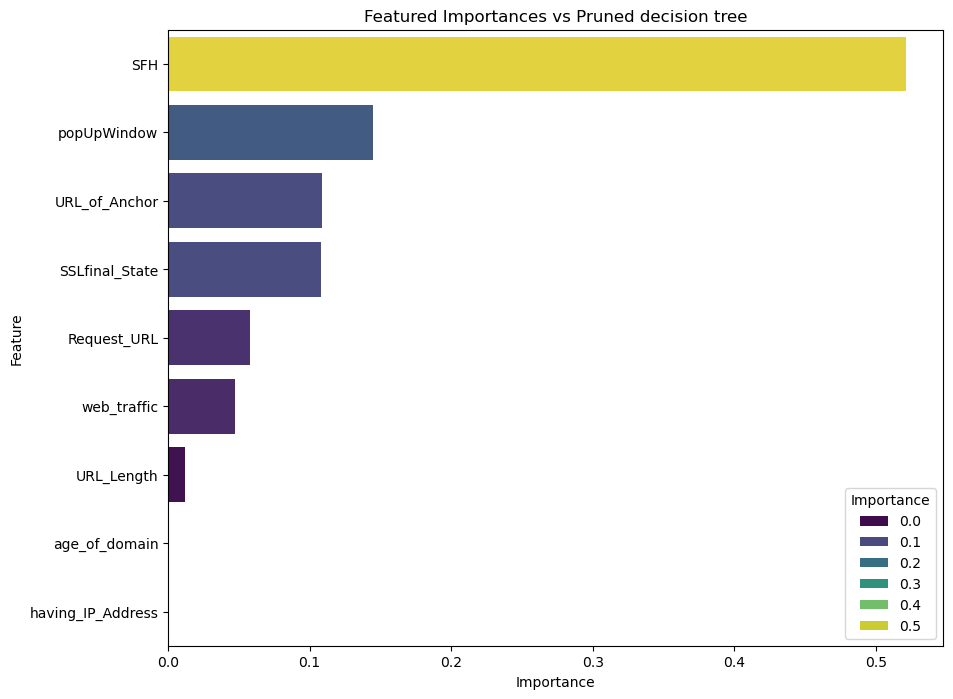

In [285]:
#Post pruning feature importance barplot
import seaborn as sns

feature_importances = pd.DataFrame({
    "Features" : X_train.columns,
    "Importance": pruned_model.feature_importances_}
)
feature_importances = feature_importances.sort_values(ascending=False, by= 'Importance')
plt.figure(figsize=(10,8))
sns.barplot(x='Importance',y='Features',data=feature_importances,hue='Importance',palette='viridis')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Featured Importances vs Pruned decision tree")
plt.show()

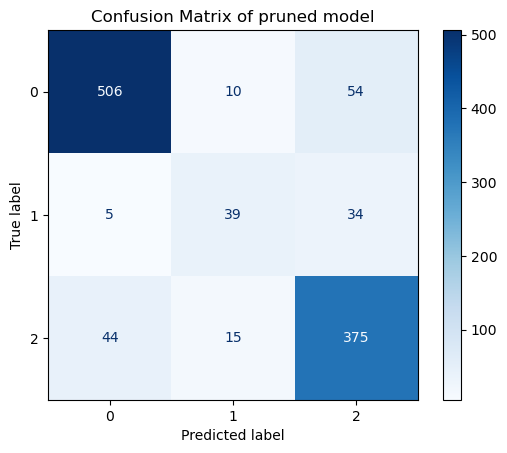

In [286]:
#Post pruned confusion matrix
yprune_pred = pruned_model.predict(X_test)
cm_prune = confusion_matrix(y_test,yprune_pred)

cmplot = ConfusionMatrixDisplay(confusion_matrix=cm_prune)
cmplot.plot(cmap='Blues')
plt.title("Confusion Matrix of pruned model")
plt.show()


In [287]:
#FInal accuracy post pruning
pruned_Accuracy = accuracy_score(y_test,yprune_pred)
print(f"Accuracy score after pruning: {pruned_Accuracy:.2f}")

Accuracy score after pruning: 0.85


Since accuracy remains the same, pruning successfully reduced model complexity without harming performance.                                                                   This means:
✅ Pruning worked as intended—the model is now simpler and easier to interpret.